In [16]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.integrate import solve_ivp
from math import dist
import pandas as pd

In [17]:
global NumSpecies,mu,lambdaa,gamma,delta,D,eta,kappa,Ip

In [18]:
def MultiSpecies(t,y):
    dydt=np.zeros(NumSpecies*(1+NumSpecies))
    for i in range(NumSpecies):
        if y[i]==0:
            dydt[i]=Ip[i]
            for j in range(NumSpecies):
                dydt[NumSpecies+i*NumSpecies+j]=0
        else:
            ss=1
            sumy_neg=0
            sumy_pos=0
            for j in range(NumSpecies):
                if i!=j:
                    ss=ss*(1+lambdaa[j]*y[NumSpecies+i*NumSpecies+j]/y[i])
                if gamma[j,i]<0:
                    sumy_neg=sumy_neg+gamma[j,i]*y[j]
                if gamma[j,i]>0:
                    sumy_pos=sumy_pos+gamma[j,i]*y[j]
            dydt[i]=mu[i]*y[i]*ss*(1+sumy_neg+delta[i]*sumy_pos/(1+sumy_pos))-D*y[i]+Ip[i]
            for j in range(NumSpecies):
                if j==i:
                    dydt[NumSpecies+i*NumSpecies+j]=dydt[i]
                else:
                    ss=1
                    for k in range(NumSpecies):
                        if k!=i and k!=j:
                            ss=ss*(1+lambdaa[k]*y[NumSpecies+i*NumSpecies+k]/y[i])
                    donor=0
                    for k in range(NumSpecies):
                        donor=donor+y[NumSpecies+k*NumSpecies+j]
                    dydt[NumSpecies+i*NumSpecies+j]=mu[i]*y[NumSpecies+i*NumSpecies+j]*ss*(1+lambdaa[j])*(1+sumy_neg+delta[i]*sumy_pos/(1+sumy_pos))+eta*(y[i]-y[NumSpecies+i*NumSpecies+j])*donor-(kappa+D)*y[NumSpecies+i*NumSpecies+j]
    return dydt

In [19]:
NumSpecies=8
mu0=0.5
etas=np.arange(0,0.45,0.1)
repeat=200
Ip=0*np.ones(NumSpecies)
neg_fraq=1
pos_fraq=0
delta=0.2*np.ones(NumSpecies)
kappa=0.005
D=0.2
thresh=0.05

In [20]:
timespan=np.arange(0,2000.1,.1)
nn=5
Abun=np.zeros((nn,len(etas),repeat,NumSpecies))
for zxc in range(nn):
    lambdaa=-0.4+0.8*np.random.rand(NumSpecies)
    mu=np.multiply(mu0,1+lambdaa)
    gamma=np.zeros((NumSpecies,NumSpecies))
    for i in range(NumSpecies):
        #for j in np.arange(i,NumSpecies,1):
        for j in range(NumSpecies):
            if i==j:
                gamma[i,j]=-1
            else:
                temp=np.random.rand()
                if temp<neg_fraq:
                    gamma[i,j]=-1.05#(1+0.5*np.random.rand())
                    #gamma[j,i]=-(1+0.5*np.random.rand())
                if temp>1-pos_fraq:
                    gamma[i,j]=0.5
                    #gamma[j,i]=0.5

    for i in range(len(etas)):
        
        eta=etas[i]
        for hjk in range(repeat):
            print(zxc*len(etas)*repeat+i*repeat+hjk)
            initial=np.zeros(NumSpecies**2+NumSpecies)
            for j in range(NumSpecies):
                initial[j]=np.random.rand()#*2/NumSpecies
                initial[NumSpecies+j*NumSpecies+j]=initial[j]
                for xcvv in range(NumSpecies):
                    if xcvv!=j:
                        initial[NumSpecies+j*NumSpecies+xcvv]=initial[j]*np.random.rand()**2
            sol=solve_ivp(MultiSpecies,[0,max(timespan)],initial,method='RK45',t_eval=timespan)
            y=np.transpose(sol.y)
            temp=y[-1,range(NumSpecies)]
            Abun[zxc,i,hjk,:]=temp       

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

C:\Users\Admin\AppData\Local\Temp\ipykernel_24280\2287880349.py:19: RuntimeWarning: overflow encountered in scalar multiply
  dydt[i]=mu[i]*y[i]*ss*(1+sumy_neg+delta[i]*sumy_pos/(1+sumy_pos))-D*y[i]+Ip[i]
C:\Users\Admin\AppData\Local\Temp\ipykernel_24280\2287880349.py:31: RuntimeWarning: overflow encountered in scalar multiply
  dydt[NumSpecies+i*NumSpecies+j]=mu[i]*y[NumSpecies+i*NumSpecies+j]*ss*(1+lambdaa[j])*(1+sumy_neg+delta[i]*sumy_pos/(1+sumy_pos))+eta*(y[i]-y[NumSpecies+i*NumSpecies+j])*donor-(kappa+D)*y[NumSpecies+i*NumSpecies+j]
C:\Users\Admin\AppData\Local\Temp\ipykernel_24280\2287880349.py:31: RuntimeWarning: invalid value encountered in scalar add
  dydt[NumSpecies+i*NumSpecies+j]=mu[i]*y[NumSpecies+i*NumSpecies+j]*ss*(1+lambdaa[j])*(1+sumy_neg+delta[i]*sumy_pos/(1+sumy_pos))+eta*(y[i]-y[NumSpecies+i*NumSpecies+j])*donor-(kappa+D)*y[NumSpecies+i*NumSpecies+j]


1404
1405
1406
1407
1408
1409
1410
1411
1412
1413
1414
1415
1416
1417
1418
1419
1420
1421
1422
1423
1424
1425
1426
1427
1428
1429
1430
1431
1432
1433
1434
1435
1436
1437
1438
1439
1440
1441
1442
1443
1444
1445
1446
1447
1448
1449
1450
1451
1452
1453
1454
1455
1456
1457
1458
1459
1460
1461
1462
1463
1464
1465
1466
1467
1468
1469
1470
1471
1472
1473
1474
1475
1476
1477
1478
1479
1480
1481
1482
1483
1484
1485
1486
1487
1488
1489
1490
1491
1492
1493
1494
1495
1496
1497
1498
1499
1500
1501
1502
1503
1504
1505
1506
1507
1508
1509
1510
1511
1512
1513
1514
1515
1516
1517
1518
1519
1520
1521
1522
1523
1524
1525
1526
1527
1528
1529
1530
1531
1532
1533
1534
1535
1536
1537
1538
1539
1540
1541
1542
1543
1544
1545
1546
1547
1548
1549
1550
1551
1552
1553
1554
1555
1556
1557
1558
1559
1560
1561
1562
1563
1564
1565
1566
1567
1568
1569
1570
1571
1572
1573
1574
1575
1576
1577
1578
1579
1580
1581
1582
1583
1584
1585
1586
1587
1588
1589
1590
1591
1592
1593
1594
1595
1596
1597
1598
1599
1600
1601
1602
1603


C:\Users\Admin\AppData\Local\Temp\ipykernel_24280\2287880349.py:14: RuntimeWarning: invalid value encountered in scalar divide
  ss=ss*(1+lambdaa[j]*y[NumSpecies+i*NumSpecies+j]/y[i])
C:\Users\Admin\AppData\Local\Temp\ipykernel_24280\2287880349.py:27: RuntimeWarning: invalid value encountered in scalar divide
  ss=ss*(1+lambdaa[k]*y[NumSpecies+i*NumSpecies+k]/y[i])
C:\Users\Admin\AppData\Local\Temp\ipykernel_24280\2287880349.py:31: RuntimeWarning: invalid value encountered in scalar subtract
  dydt[NumSpecies+i*NumSpecies+j]=mu[i]*y[NumSpecies+i*NumSpecies+j]*ss*(1+lambdaa[j])*(1+sumy_neg+delta[i]*sumy_pos/(1+sumy_pos))+eta*(y[i]-y[NumSpecies+i*NumSpecies+j])*donor-(kappa+D)*y[NumSpecies+i*NumSpecies+j]


1677
1678
1679
1680
1681
1682
1683
1684
1685
1686
1687
1688
1689
1690
1691
1692
1693
1694
1695
1696
1697
1698
1699
1700
1701
1702
1703
1704
1705
1706
1707
1708
1709
1710
1711
1712
1713
1714
1715
1716
1717
1718
1719
1720
1721
1722
1723
1724
1725
1726
1727
1728
1729
1730
1731
1732
1733
1734
1735
1736
1737
1738
1739
1740
1741
1742
1743
1744
1745
1746
1747
1748
1749
1750
1751
1752
1753
1754
1755
1756
1757
1758
1759
1760
1761
1762
1763
1764
1765
1766
1767
1768
1769
1770
1771
1772
1773
1774
1775
1776
1777
1778
1779
1780
1781
1782
1783
1784
1785
1786
1787
1788
1789
1790
1791
1792
1793
1794
1795
1796
1797
1798
1799
1800
1801
1802
1803
1804
1805
1806
1807
1808
1809
1810
1811
1812
1813
1814
1815
1816
1817
1818
1819
1820
1821
1822
1823
1824
1825
1826
1827
1828
1829
1830
1831


C:\Users\Admin\AppData\Local\Temp\ipykernel_24280\2287880349.py:31: RuntimeWarning: overflow encountered in scalar add
  dydt[NumSpecies+i*NumSpecies+j]=mu[i]*y[NumSpecies+i*NumSpecies+j]*ss*(1+lambdaa[j])*(1+sumy_neg+delta[i]*sumy_pos/(1+sumy_pos))+eta*(y[i]-y[NumSpecies+i*NumSpecies+j])*donor-(kappa+D)*y[NumSpecies+i*NumSpecies+j]


1832
1833
1834
1835
1836
1837
1838
1839
1840
1841
1842
1843
1844
1845
1846
1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031


In [21]:
NumStab=np.zeros((nn,len(etas)))
MetaDiver=np.zeros((nn,len(etas)))
for zxc in range(nn):
    for i in range(len(etas)):
        Index=np.zeros(repeat)
        Index[0]=1
        for j in np.arange(1,repeat,1):
            tempj=Abun[zxc,i,j,:]
            pin=0
            for k in range(j):
                tempk=Abun[zxc,i,k,:]
                tttt=tempj-tempk
                dis=np.sqrt(sum(np.multiply(tttt,tttt)))
                if dis<thresh:
                    Index[j]=Index[k]
                    pin=1
            if pin==0:
                Index[j]=max(Index)+1

        NumStab[zxc,i]=max(Index)
        AbunTot=np.zeros(int(np.max(Index)))
        for rgn in range(int(max(Index))):
            AbunTot[rgn]=np.sum(Index==rgn+1)
        AbunTot=np.divide(AbunTot,sum(AbunTot))
        MetaDiver[zxc,i]=np.exp(np.sum(-np.multiply(AbunTot,np.log(AbunTot))))



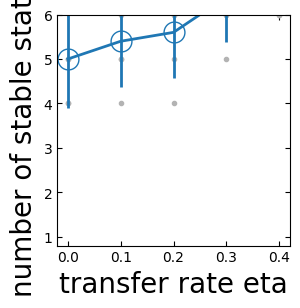

In [22]:
plt.figure(figsize=(3,3))
for i in range(nn):
    plt.plot(etas,NumStab[i,:],'.',color=(0.7,0.7,0.7))
plt.errorbar(etas,np.mean(NumStab,0),yerr=np.std(NumStab,0),marker='o',fillstyle='none',markersize=15,linewidth=2)
plt.xlabel('transfer rate eta',fontsize=20)
plt.ylabel('number of stable states',fontsize=20)
plt.tick_params(direction='in',top='true',right='true')
plt.ylim(0.8,6)
plt.savefig('NumStab_1.pdf')
plt.show()
import pandas as pd
df=pd.DataFrame(NumStab)
df.to_csv("NumStab.csv")

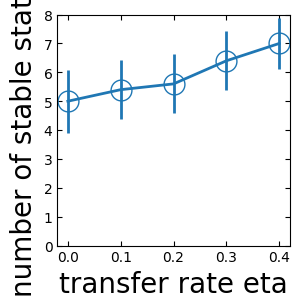

In [23]:
plt.figure(figsize=(3,3))
#for i in range(nn):
    #plt.plot(etas,NumStab[i,:],'.',color=(0.7,0.7,0.7))
plt.errorbar(etas,np.mean(NumStab,0),yerr=np.std(NumStab,0),marker='o',fillstyle='none',markersize=15,linewidth=2)
plt.xlabel('transfer rate eta',fontsize=20)
plt.ylabel('number of stable states',fontsize=20)
plt.tick_params(direction='in',top='true',right='true')
plt.ylim(0,8)
plt.savefig('NumStab_1_OnlyBar.pdf')
plt.show()

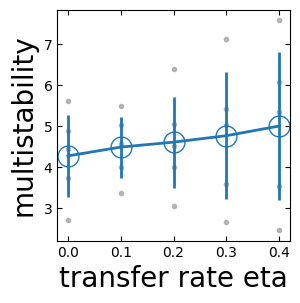

In [24]:
plt.figure(figsize=(3,3))
for i in range(nn):
    plt.plot(etas,MetaDiver[i,:],'.',color=(0.7,0.7,0.7))
plt.errorbar(etas,np.mean(MetaDiver,0),yerr=np.std(MetaDiver,0),marker='o',fillstyle='none',markersize=15,linewidth=2)
plt.xlabel('transfer rate eta',fontsize=20)
plt.ylabel('multistability',fontsize=20)
plt.tick_params(direction='in',top='true',right='true')
plt.savefig('NumStab_2.pdf')
plt.show()

df=pd.DataFrame(MetaDiver)
df.to_csv("MetaDiver.csv")

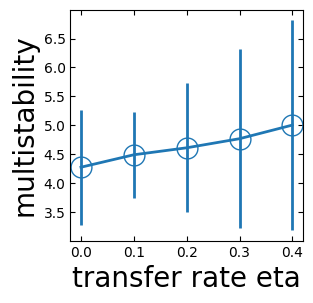

In [25]:
plt.figure(figsize=(3,3))
#for i in range(nn):
    #plt.plot(etas,MetaDiver[i,:],'.',color=(0.7,0.7,0.7))
plt.errorbar(etas,np.mean(MetaDiver,0),yerr=np.std(MetaDiver,0),marker='o',fillstyle='none',markersize=15,linewidth=2)
plt.xlabel('transfer rate eta',fontsize=20)
plt.ylabel('multistability',fontsize=20)
plt.tick_params(direction='in',top='true',right='true')
plt.savefig('NumStab_2_OnlyBar.pdf')
plt.show()

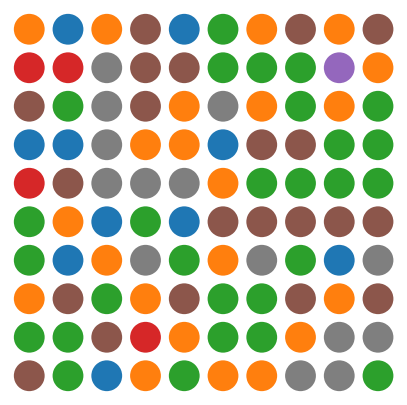

In [26]:
plt.figure(figsize=(5,5))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.pie(Abun[0,0,i,:])
plt.subplots_adjust(wspace=0,hspace=0)
plt.savefig('Meta_Eta0.pdf')
plt.show()

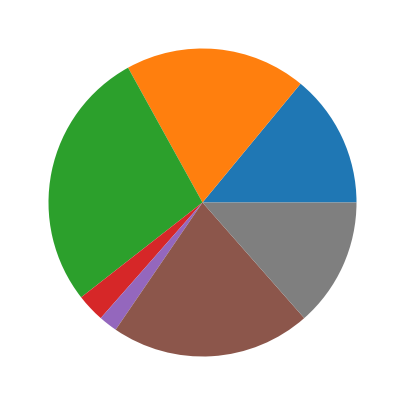

In [27]:
plt.figure(figsize=(5,5))
plt.pie(np.sum(Abun[0,0,:,:],axis=0))
plt.subplots_adjust(wspace=0,hspace=0)
plt.savefig('Meta_Eta0_TotalPie.pdf')
plt.show()

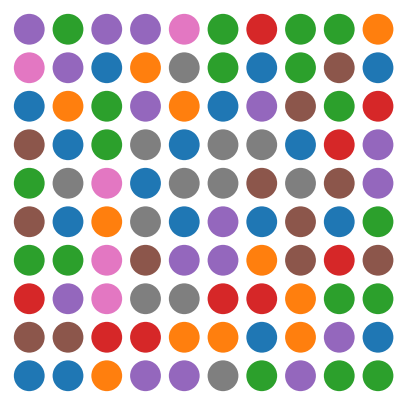

In [28]:
plt.figure(figsize=(5,5))
AbunP=np.multiply(Abun,Abun>0)
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.pie(AbunP[0,-1,i,:])
plt.subplots_adjust(wspace=0,hspace=0)
plt.savefig('Meta_Eta04.pdf')
plt.show()

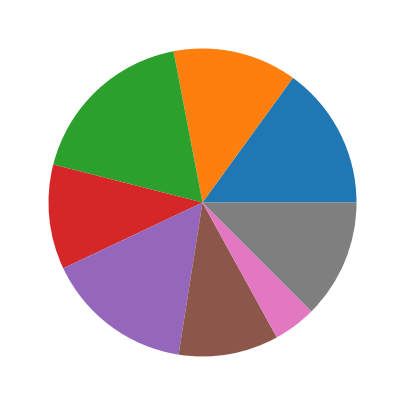

In [29]:
plt.figure(figsize=(5,5))
plt.pie(np.sum(AbunP[0,-1,:,:],axis=0))
plt.subplots_adjust(wspace=0,hspace=0)
plt.savefig('Meta_Eta04_TotalPie.pdf')
plt.show()